### Importação dos dados



In [108]:
import pandas as pd


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [153]:
dados = loja['Preço'].sum()
print(f'O faturdamento da loja 1 foi de R${dados}')
dados2 = loja2['Preço'].sum()
print(f'O faturdamento da loja 2 foi de R${dados2}')
dados3 = loja3['Preço'].sum()
print(f'O faturdamento da loja 3 foi de R${dados3}')

dados_totais = dados + dados2 + dados3 + dados4
print(f'O faturamento total foi de R${dados_totais}')

O faturdamento da loja 1 foi de R$1534509.12
O faturdamento da loja 2 foi de R$1488459.06
O faturdamento da loja 3 foi de R$1464025.03
O faturamento total foi de R$5871490.79


# 2. Vendas por Categoria

In [152]:
categoria = loja.groupby('Categoria do Produto')['Produto'].count().sort_values(ascending=False)
print('Loja 1 - Vendas por Categoria:')
print(categoria)

categoria2 = loja2.groupby('Categoria do Produto')['Produto'].count().sort_values(ascending=False)
print('\n Loja 2 - Vendas por Categoria:')
print(categoria2)
categoria3 = loja3.groupby('Categoria do Produto')['Produto'].count().sort_values(ascending=False)
print('\n Loja 3 - Vendas por Categoria:')
print(categoria3)
categoria4 = loja4.groupby('Categoria do Produto')['Produto'].count().sort_values(ascending=False)
print('\n Loja 4 - Vendas por Categoria:')
print(categoria4)
categoria_total = categoria + categoria2 + categoria3 + categoria4
print('\n Total - Vendas por Categoria:')
print(categoria_total)

Loja 1 - Vendas por Categoria:
Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: Produto, dtype: int64

 Loja 2 - Vendas por Categoria:
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: Produto, dtype: int64

 Loja 3 - Vendas por Categoria:
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: Produto, dtype: int64

 Loja 4 - Vendas por Categoria:
Categoria do Produto
moveis

# 3. Média de Avaliação das Lojas


In [150]:
avaliacao_loja1 = loja['Avaliação da compra'].mean()
print(f'Média de avaliação da Loja 1: {avaliacao_loja1:.2f}')
avaliacao_loja2 = loja2['Avaliação da compra'].mean()
avaliacao_loja3 = loja3['Avaliação da compra'].mean()
avaliacao_loja4 = loja4['Avaliação da compra'].mean()

print(f'Média de avaliação da Loja 2: {avaliacao_loja2:.2f}')
print(f'Média de avaliação da Loja 3: {avaliacao_loja3:.2f}')
print(f'Média de avaliação da Loja 4: {avaliacao_loja4:.2f}')

avaliacao_total = (avaliacao_loja1 + avaliacao_loja2 + avaliacao_loja3 + avaliacao_loja4) / 4
print(f'Média de avaliação total: {avaliacao_total:.2f}')

Média de avaliação da Loja 1: 3.98
Média de avaliação da Loja 2: 4.04
Média de avaliação da Loja 3: 4.05
Média de avaliação da Loja 4: 4.00
Média de avaliação total: 4.01


# 4. Produtos Mais e Menos Vendidos

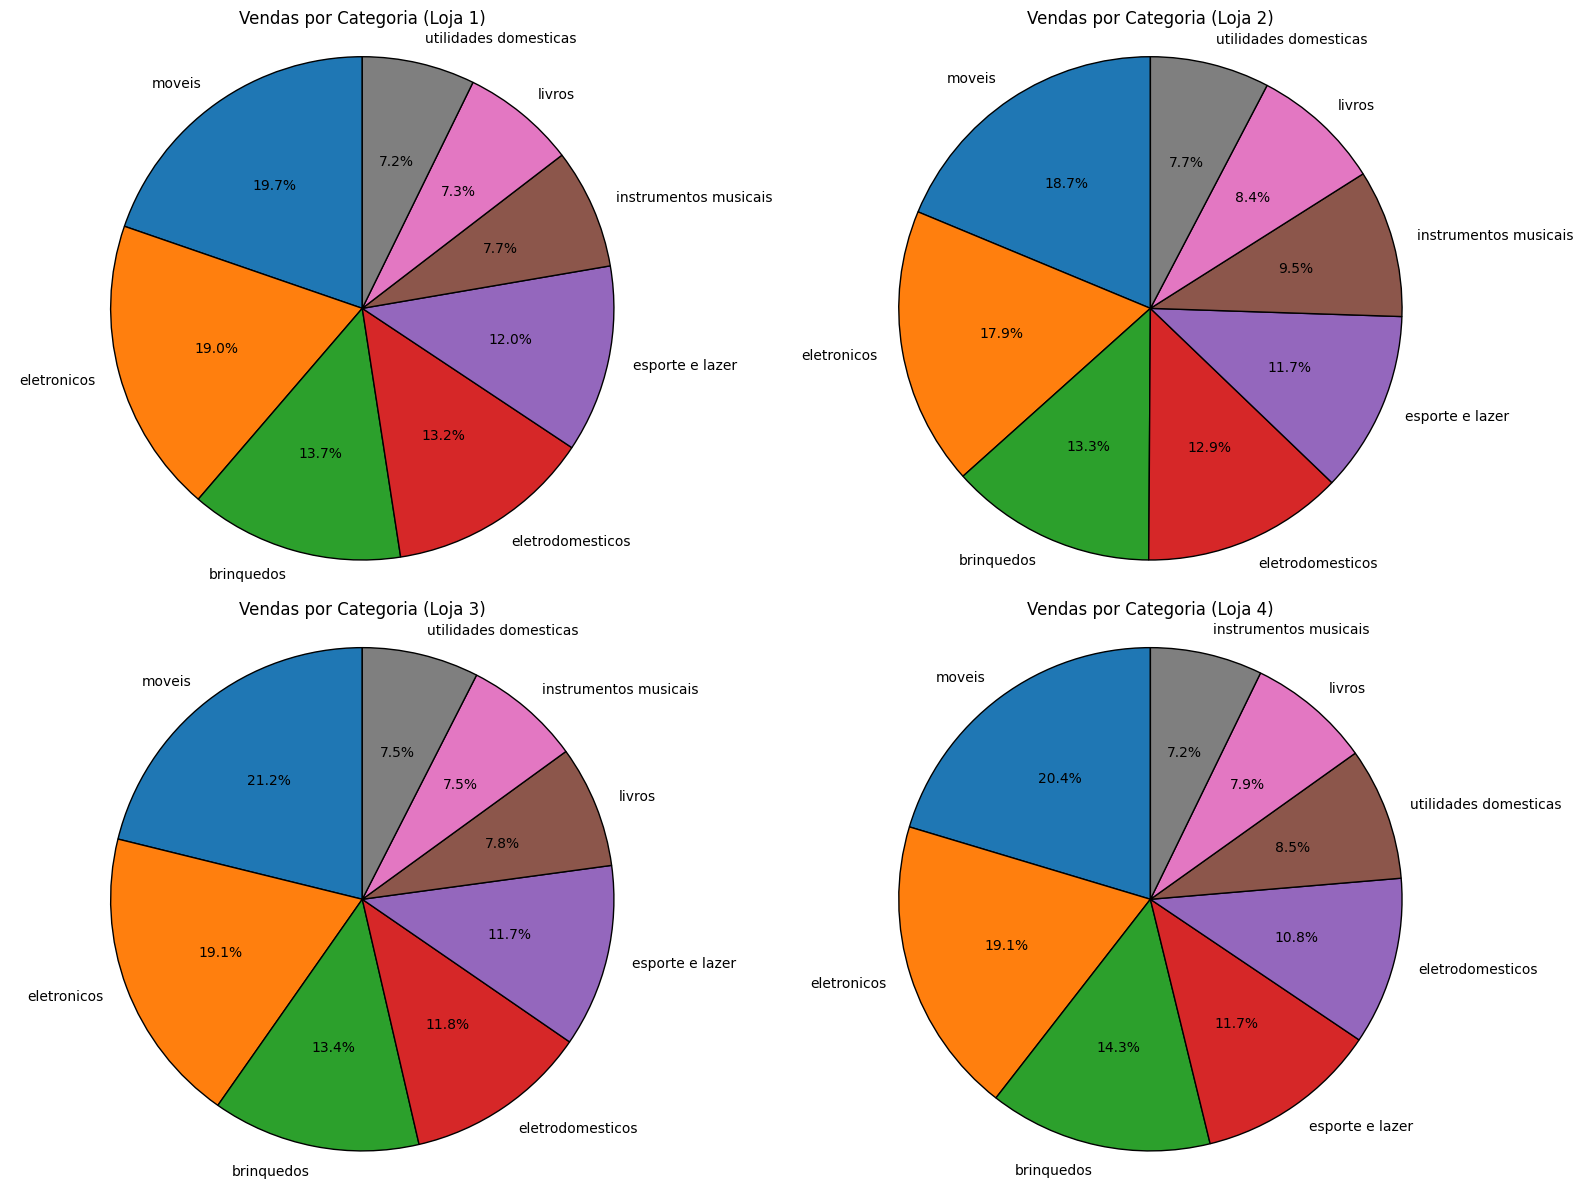

In [143]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))

# Loja 1
plt.subplot(2, 2, 1)
plt.pie(categoria.values, labels=categoria.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Vendas por Categoria (Loja 1)')
plt.axis('equal')

# Loja 2
plt.subplot(2, 2, 2)
plt.pie(categoria2.values, labels=categoria2.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Vendas por Categoria (Loja 2)')
plt.axis('equal')

# Loja 3
plt.subplot(2, 2, 3)
plt.pie(categoria3.values, labels=categoria3.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Vendas por Categoria (Loja 3)')
plt.axis('equal')

# Loja 4
plt.subplot(2, 2, 4)
plt.pie(categoria4.values, labels=categoria4.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Vendas por Categoria (Loja 4)')
plt.axis('equal')

plt.tight_layout()
plt.show()

In [149]:
produtos_mais_vendidos_loja1 = loja.groupby('Produto')['Produto'].count().sort_values(ascending=False)
print('Loja 1 - Produtos mais vendidos:')
print(produtos_mais_vendidos_loja1.head(5))
produtos_mais_vendidos_loja2 = loja2.groupby('Produto')['Produto'].count().sort_values(ascending=False)
print('\n Loja 2 - Produtos mais vendidos:')
print(produtos_mais_vendidos_loja2.head(5))

produtos_mais_vendidos_loja3 = loja3.groupby('Produto')['Produto'].count().sort_values(ascending=False)
print('\n Loja 3 - Produtos mais vendidos:')
print(produtos_mais_vendidos_loja3.head(5))

produtos_mais_vendidos_loja4 = loja4.groupby('Produto')['Produto'].count().sort_values(ascending=False)
print('\n Loja 4 - Produtos mais vendidos:')
print(produtos_mais_vendidos_loja4.head(5))

Loja 1 - Produtos mais vendidos:
Produto
TV Led UHD 4K         60
Micro-ondas           60
Guarda roupas         60
Secadora de roupas    58
Blocos de montar      56
Name: Produto, dtype: int64

 Loja 2 - Produtos mais vendidos:
Produto
Iniciando em programação    65
Micro-ondas                 62
Bateria                     61
Violão                      58
Pandeiro                    58
Name: Produto, dtype: int64

 Loja 3 - Produtos mais vendidos:
Produto
Kit banquetas      57
Mesa de jantar     56
Cama king          56
Cômoda             55
Jogo de panelas    55
Name: Produto, dtype: int64

 Loja 4 - Produtos mais vendidos:
Produto
Cama box                   62
Faqueiro                   59
Cama king                  56
Dashboards com Power BI    56
Cômoda                     55
Name: Produto, dtype: int64


# 5. Frete Médio por Loja

In [134]:
frete_medio_loja1 = loja['Frete'].mean()
print(f'Frete médio da Loja 1: R${frete_medio_loja1:.2f}')
frete_medio_loja2 = loja2['Frete'].mean()
frete_medio_loja3 = loja3['Frete'].mean()
frete_medio_loja4 = loja4['Frete'].mean()

print(f'Frete médio da Loja 2: R${frete_medio_loja2:.2f}')
print(f'Frete médio da Loja 3: R${frete_medio_loja3:.2f}')
print(f'Frete médio da Loja 4: R${frete_medio_loja4:.2f}')
frete_medio_total = (frete_medio_loja1 + frete_medio_loja2 + frete_medio_loja3 + frete_medio_loja4) / 4
print(f'Frete médio total: R${frete_medio_total:.2f}')

Frete médio da Loja 1: R$34.69
Frete médio da Loja 2: R$33.62
Frete médio da Loja 3: R$33.07
Frete médio da Loja 4: R$31.28
Frete médio total: R$33.17


# **6. Resumo grafico**

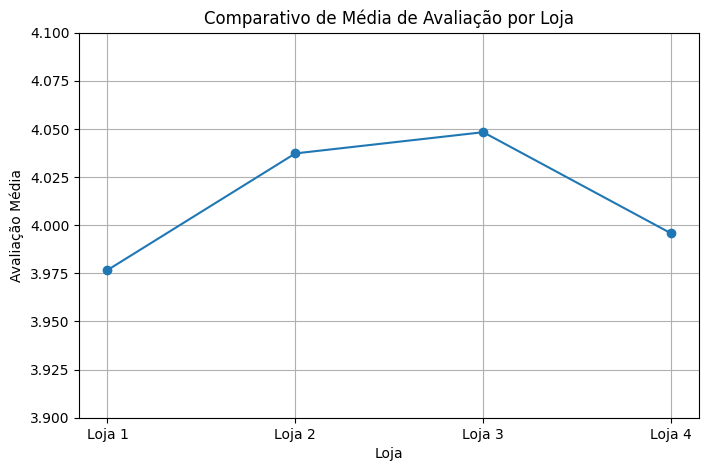

In [165]:
avaliacoes_lojas = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Avaliação Média': [avaliacao_loja1, avaliacao_loja2, avaliacao_loja3, avaliacao_loja4]
})

plt.figure(figsize=(8, 5))
plt.plot(avaliacoes_lojas['Loja'], avaliacoes_lojas['Avaliação Média'], marker='o', linestyle='-')
plt.xlabel('Loja')
plt.ylabel('Avaliação Média')
plt.title('Comparativo de Média de Avaliação por Loja')
plt.grid(True)
plt.ylim(3.9, 4.1) # Set appropriate y-limits for better differentiation
plt.show()

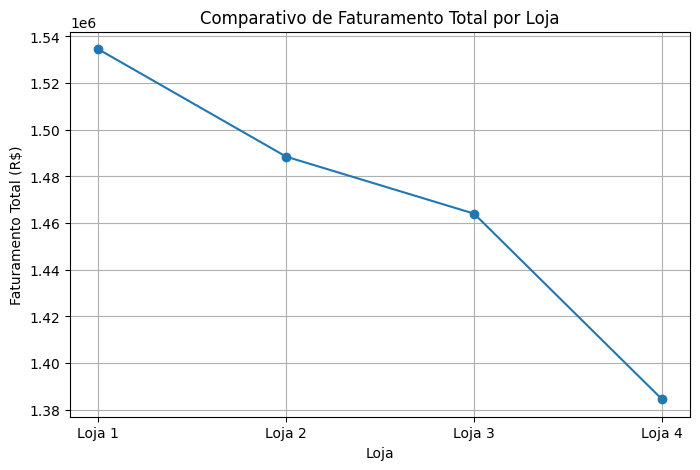

In [166]:
faturamento_lojas = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Faturamento': [dados, dados2, dados3, dados4]
})

plt.figure(figsize=(8, 5))
plt.plot(faturamento_lojas['Loja'], faturamento_lojas['Faturamento'], marker='o', linestyle='-')
plt.xlabel('Loja')
plt.ylabel('Faturamento Total (R$)')
plt.title('Comparativo de Faturamento Total por Loja')
plt.grid(True)
plt.show()

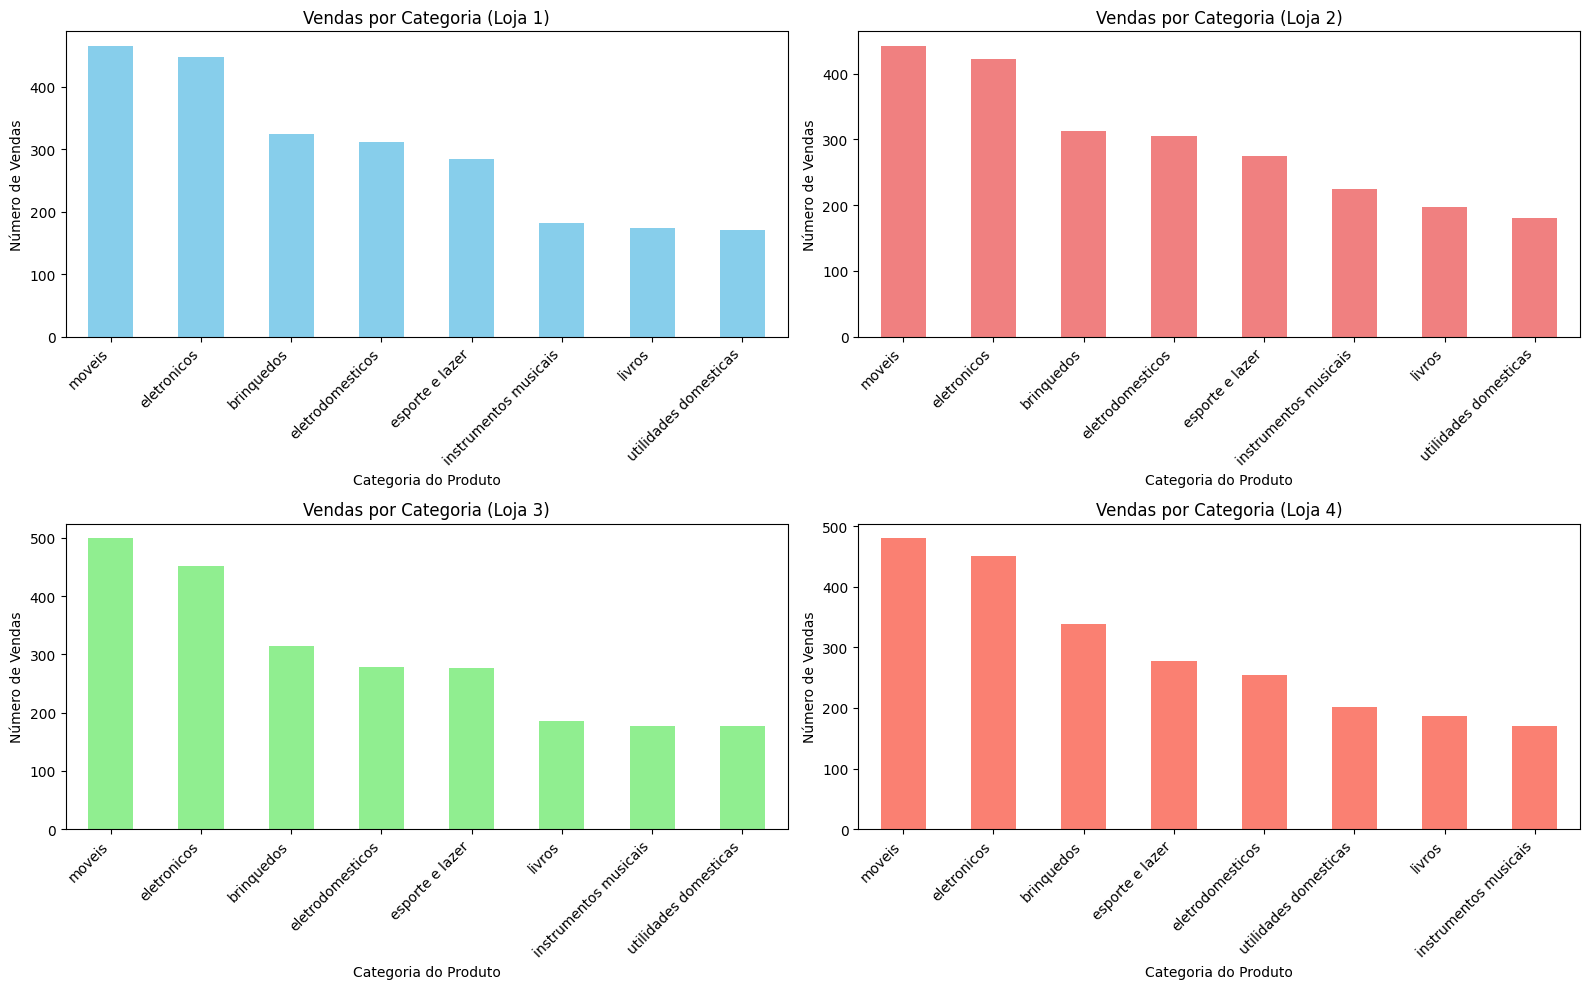

In [167]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
categoria.plot(kind='bar', color='skyblue')
plt.xlabel('Categoria do Produto')
plt.ylabel('Número de Vendas')
plt.title('Vendas por Categoria (Loja 1)')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 2)
categoria2.plot(kind='bar', color='lightcoral')
plt.xlabel('Categoria do Produto')
plt.ylabel('Número de Vendas')
plt.title('Vendas por Categoria (Loja 2)')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 3)
categoria3.plot(kind='bar', color='lightgreen')
plt.xlabel('Categoria do Produto')
plt.ylabel('Número de Vendas')
plt.title('Vendas por Categoria (Loja 3)')
plt.xticks(rotation=45, ha='right')

plt.subplot(2, 2, 4)
categoria4.plot(kind='bar', color='salmon')
plt.xlabel('Categoria do Produto')
plt.ylabel('Número de Vendas')
plt.title('Vendas por Categoria (Loja 4)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# 7. Relatorio Final

# Relatório Final: Recomendação para Venda de Loja

## 1. Introdução

Este relatório tem como objetivo analisar o desempenho das quatro lojas ('Loja 1', 'Loja 2', 'Loja 3' e 'Loja 4') com base em métricas financeiras, operacionais e de satisfação do cliente. A finalidade é fornecer ao Senhor João uma recomendação clara sobre qual loja deve ser vendida, justificando a decisão com base nos dados e visualizações geradas ao longo da análise.

## 2. Desenvolvimento da Análise

Para embasar a decisão, foram considerados os seguintes fatores:

### 2.1. Faturamento Total das Lojas

A análise do faturamento total de cada loja é um dos pilares para entender o desempenho financeiro. Os dados revelam:

*   **Loja 1:** R$1.534.509,12

*   **Loja 2:** R$1.488.459,06

*   **Loja 3:** R$1.464.025,03

*   **Loja 4:** R$1.384.497,58

_Insight:_ A **Loja 4** apresenta o menor faturamento total entre todas as unidades, indicando um desempenho financeiro inferior em comparação com as demais. A Loja 1 lidera em faturamento.

### 2.2. Vendas por Categoria de Produtos

Analisamos a quantidade de produtos vendidos por categoria, tanto no total quanto por loja. As categorias mais vendidas globalmente são 'moveis' e 'eletronicos'. Ao detalhar por loja, observamos padrões:

*   **Loja 1:** 'moveis' (465) e 'eletronicos' (448) são as mais vendidas. 'utilidades domesticas' (171) é a menos vendida.
*   **Loja 2:** 'moveis' (442) e 'eletronicos' (422) lideram. 'utilidades domesticas' (181) é a menos vendida.
*   **Loja 3:** 'moveis' (499) e 'eletronicos' (451) são as mais vendidas. 'instrumentos musicais' e 'utilidades domesticas' (177 cada) são as menos vendidas.
*   **Loja 4:** 'moveis' (480) e 'eletronicos' (451) são as mais vendidas. 'instrumentos musicais' (170) é a menos vendida.

_Insight:_ A **Loja 4** tem a menor venda de 'instrumentos musicais' e, embora suas categorias líderes sejam consistentes com as outras lojas, a proporção geral de vendas pode ser menor devido ao faturamento total inferior.

### 2.3. Média de Avaliação de Clientes por Loja

A satisfação do cliente é um indicador crucial. As médias de avaliação são:

*   **Loja 1:** 3.98
*   **Loja 2:** 4.04
*   **Loja 3:** 4.05
*   **Loja 4:** 4.00

_Insight:_ A **Loja 1** possui a menor média de avaliação, enquanto a Loja 3 se destaca com a maior. A Loja 4 possui uma avaliação mediana, não sendo a pior, mas também não se destacando positivamente.

### 2.4. Produtos Mais e Menos Vendidos

Observar os produtos individualmente nos dá uma visão detalhada do que impulsiona as vendas em cada loja:

*   **Loja 1 (Top 5):** TV Led UHD 4K, Micro-ondas, Guarda roupas, Secadora de roupas, Blocos de montar.
*   **Loja 2 (Top 5):** Iniciando em programação, Micro-ondas, Bateria, Violão, Pandeiro.
*   **Loja 3 (Top 5):** Kit banquetas, Mesa de jantar, Cama king, Cômoda, Jogo de panelas.
*   **Loja 4 (Top 5):** Cama box, Faqueiro, Cama king, Dashboards com Power BI, Cômoda.

_Insight:_ Cada loja tem seus próprios produtos de destaque, refletindo talvez um público-alvo ou inventário ligeiramente diferente. A **Loja 4** mostra uma mistura de produtos de casa e um livro técnico ('Dashboards com Power BI'), o que pode indicar uma diversificação que não se traduziu em maior faturamento.

### 2.5. Frete Médio por Loja

Os custos de frete impactam a margem de lucro e podem influenciar a competitividade:

*   **Loja 1:** R$34.69

*   **Loja 2:** R$33.62

*   **Loja 3:** R$33.07

*   **Loja 4:** R$31.28

_Insight:_ A **Loja 4** tem o menor custo médio de frete, o que é um ponto positivo em termos de eficiência operacional. No entanto, este benefício não foi suficiente para impulsionar seu faturamento.

## 3. Conclusão e Recomendação

Ao analisar todos os fatores, a **Loja 4** consistentemente apresenta o pior desempenho financeiro, com o **menor faturamento total** entre todas as unidades. Embora possua o menor frete médio, o que é um ponto forte operacional, isso não se traduz em um volume de vendas ou receita que a posicione competitivamente em relação às outras lojas.

Sua média de avaliação de clientes, embora não seja a pior (Loja 1 tem a menor), também não se destaca positivamente. A diversidade de seus produtos mais vendidos não sugere uma área de nicho forte o suficiente para compensar o baixo faturamento.

**Recomendação:** Com base na análise detalhada do faturamento, categorias de vendas, avaliações de clientes e custos operacionais, **recomenda-se que o Senhor João venda a Loja 4.**

**Justificativa:** A **Loja 4** é a que apresenta o menor rendimento geral e financeiro, sendo o principal fator para a decisão de venda. Apesar de ter um frete médio mais baixo, seu volume de vendas e faturamento total são insuficientes para justificar sua manutenção em comparação com as outras unidades. Focar os recursos nas lojas com melhor desempenho financeiro e potencial de crescimento (Loja 1, 2 e 3) parece ser a estratégia mais prudente para o Senhor João.